# Project "Ballers"

#### By: Reza Husain and Luke Kim

> Github: Main: 

        
> https://github.com/CS418/group-project-ballers/tree/main
        

## Any Changes

> We changed one data source for the graduation rate. In addition to test one of our hypothesis, we also added third data source that contains U.S GDP growth rate from 1960 to 2021. 

## Data
> We have total 3 data sources: 
> 1. Historical Data of Education Commpletion: https://www.census.gov/data/tables/time-series/demo/educational-attainment/cps-historical-time-series.html
> 2. History of tuition in 4 year Institutions: https://nces.ed.gov/programs/digest/d17/tables/dt17_330.10.asp
> 3. U.S GDP data: https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG

> One of our question was "Does increase in tuition and GDP affect college graduation rates?". To answer the question, we needed 3 data sets such as tuition rates, college graduation rates, and GDP growth. The above data satisfies for the problem we have and for the further exploration. 

> We care about the problem because the starting salary of college graduates are deadlock even though the cost of living and tuition increases. We can extract the insight of the correlation of GDP, tuition, and graduation. Quality of life could potentially increase or decrease depending on the trends of college attendance. 

## Research questions

> Increase in tuition would correlate the increase in GDP that both would positively affect on the graduation rate.

> One of our question was "Does increase in tuition and GDP affect college graduation rates?". To answer the question, we needed 3 data sets such as tuition rates, college graduation rates, and GDP growth. The above data satisfies for the problem we have and for the further exploration. 

#####  Loading tuition data

In [80]:
# Library Import
import pandas as pd
import numpy as np
import xlrd

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
   HIGHTLIGHT = "\033[1;43m"


In [81]:
# Data Overview
# reading by setting sheet_name to 0th row, and skiping footers at the end of the file
tuition_xls = pd.read_excel('data/tabn330.10.xls', header=[1, 2, 3], index_col=[0], sheet_name=0, skipfooter = 7)

tuition_xls

Year and control of institution            Constant 2020-21 dollars1  \
                                Total tuition, fees, room, and board   
                                                   All insti-tutions   
1                                                           2.000000   
All institutions                                                 NaN   
1963-64                                                 10647.560685   
1968-69                                                 10761.619228   
1969-70                                                 10867.658503   
...                                                              ...   
    2016-17                                             27578.919766   
    2017-18                                             27843.085100   
    2018-19                                             28095.687629   
    2019-20                                             28195.503416   
    2020-21                                             27470.216015   

Year and control of institution                              \
                                                              
                                       4-year        2-year   
1                                    3.000000      4.000000   
All institutions                          NaN           NaN   
1963-64                          10973.419962   6616.176052   
1968-69                          11400.863864   7768.613279   
1969-70                          11664.805710   7588.871723   
...                                       ...           ...   
    2016-17                      27687.696205  27140.436030   
    2017-18                      28002.360774  26582.800288   
    2018-19                      27611.308454  31218.541616   
    2019-20                      28334.170706  25546.082262   
    2020-21                      27722.996189  23599.125467   

Year and control of institution                                           \
                                Tuition and required fees2                 
                                         All insti-tutions        4-year   
1                                                 5.000000      6.000000   
All institutions                                       NaN           NaN   
1963-64                                        4336.485596   4714.725456   
1968-69                                        4399.734947   5041.302500   
1969-70                                        4494.224441   5259.592862   
...                                                    ...           ...   
    2016-17                                   15637.015654  15640.662512   
    2017-18                                   15556.883871  15566.160239   
    2018-19                                   15356.455685  15288.961647   
    2019-20                                   15337.127375  15301.611471   
    2020-21                                   15407.456719  15442.484075   

Year and control of institution                                               \
                                               Dormitory rooms3                
                                       2-year All insti-tutions       4-year   
1                                    7.000000          8.000000     9.000000   
All institutions                          NaN               NaN          NaN   
1963-64                           1461.132123       2408.995351  2377.060276   
1968-69                           1847.435646       2658.026787  2656.948648   
1969-70                           1723.750009       2711.470481  2729.899729   
...                                       ...               ...          ...   
    2016-17                      15614.868662       7470.469861  7586.706976   
    2017-18                      15490.137809       7707.979174  7860.093283   
    2018-19                      15962.949188       7396.597020  7700.354195   
    2019-20                      15692.371809       7592.050607  7732.175219   
   

In [82]:
# reading by setting sheet_name to 0th row, and skiping footers at the end of the file
tuition_xls = pd.read_excel('data/tabn330.10.xls', header=[1, 2, 3], index_col=[0], sheet_name=0, skipfooter = 7)


#col 1 to 13: length of 4 sections:
# 0. "Total tuition, fees, room, and board"
# 1. "Tuition and required fees2"
# 2. "Dormitory rooms3"
# 3. "Board3,4"
constant_dollars = tuition_xls["Constant 2020-21 dollars1"]["Tuition and required fees2"]

#col 14 to 25 length of 4 sections:
# 0. "Total tuition, fees, room, and board"
# 1. "Tuition and required fees2"
# 2. "Dormitory rooms3"
# 3. "Board3,4"
current_dollars = tuition_xls['Current dollars']
# tfrb = constant_dollars["Tuition and required fees2"]
# constant_dollars.drop(["Country Name"], inplace=True)
tuition_const = constant_dollars['All insti-tutions']
tuition_const = tuition_const[2:56]


tuition_const.head(10)



1963-64     4336.485596
1968-69     4399.734947
1969-70     4494.224441
1970-71     4557.678257
1971-72     4628.707123
1972-73     4668.505157
1973-74     4490.655206
1974-75     4112.344501
1975-76     3933.910753
1976-77     4143.077922
Name: All insti-tutions, dtype: float64

#####  Loading graduation data 

In [83]:
graduation_xlsx = pd.read_excel('data/taba-1.xlsx', header=[3,4,5], index_col=[0], sheet_name=0, engine='openpyxl', skipfooter = 10)
year_complet = graduation_xlsx["Years of school completed"]
display(graduation_xlsx)
graduation = pd.DataFrame(year_complet["College"]["4 years or more"])
graduation.index.name = None
graduation.head(10)

# for i in four_year["4 years or more"]:
#     print(i)
# for i in four_year.index:
#     print(i)

Year              Total Years of school completed                            \
     Unnamed: 1_level_1                Elementary               High school   
     Unnamed: 1_level_2              0 to 4 years 5 to 8 years 1 to 3 years   
2022             226274                      2203         5732        11998   
2021             224580                      2074         5862        12118   
2020             223058                      2106         5788        12313   
2019             221478                      2181         6422        13372   
2018             219830                      2129         6600        13682   
...                 ...                       ...          ...          ...   
1957              15581                      2457         6752         2032   
1952              13662                      2126         6476         1664   
1950              13150                      2331         6139         1582   
1947              11810                      2000         5945         1240   
1940               9777                      1886         5217          932   

Year                                       
                  College                  
     4 years 1 to 3 years 4 years or more  
2022   64465        56659           85217  
2021   62547        56942           85037  
2020   61597        57552           83701  
2019   62259        57428           79816  
2018   62685        57810           76924  
...      ...          ...             ...  
1957    2371          854             630  
1952    1818          818             628  
1950    1593          670             436  
1947    1472          539             343  
1940     973          372             219  

[804 rows x 7 columns]

,4 years or more
2022,85217
2021,85037
2020,83701
2019,79816
2018,76924
2017,74103
2016,71900
2015,68945
2014,66879
2013,65506


##### Loading GDP file

In [84]:
usa_gdp = pd.read_excel('data/usa_gdp.xlsx')

# extract us data from the excel
gdp = pd.DataFrame(usa_gdp.iloc[0]) # us
gdp.drop(["Country Name"], inplace=True)

gdp.rename(columns = {0: "GDP growth (annual %)"}, inplace=True)
gdp

,GDP growth (annual %)
1961,2.3
1962,6.1
1963,4.4
1964,5.8
1965,6.4
...,...
2017,2.241921
2018,2.945385
2019,2.294439
2020,-2.767803


# EDA: Data Cleaning and Exploration

### 1. Data Cleaning
> Becuase we use xls files, there was a little or no errors on data consistency.


> ####  Finding None or Empty values: 

In [85]:
from scipy import stats  # we use scipy for the IQR


def isNaN(num):
    return num != num


for i in gdp['GDP growth (annual %)']:
    if i is None:
        print(i, " is NULL")
    if i == " ":
        print("Empty value")
        

for i in graduation["4 years or more"]:
    if i is None:
        print(i, " is NULL")
    if i == " ":
        print("Empty value")

dataset = pd.DataFrame(graduation)
dataset.index.astype(str)
# display(dataset)

# calculate greadutation rate 
dataset['graduation_growth_rate'] = dataset['4 years or more'].pct_change(-1)

xmean = dataset['4 years or more'].mean()
ymean = dataset['graduation_growth_rate'].mean()

# if NaN, print
# for i in graduation["4 years or more"]:
#     if isNaN(i):
#         print(i, " is NaN")  

print("again")

# cleaning X data NaN
tempx = pd.Series(dataset['4 years or more'])
tempx = tempx.fillna(tempx.mean())

# cleaning y data NaN
tempy = pd.Series(dataset["graduation_growth_rate"])
tempy = tempy.fillna(tempy.mean())

for i in tempx:
    if isNaN(i):
        print(i, " is NaN")  


dataset['4 years or more'] = pd.DataFrame(tempx)
dataset['graduation_growth_rate'] = pd.DataFrame(tempy)
display(dataset)

again


,4 years or more,graduation_growth_rate
2022,85217,0.002117
2021,85037,0.015962
2020,83701,0.048674
2019,79816,0.037596
2018,76924,0.038069
...,...,...
1957,630,0.003185
1952,628,0.440367
1950,436,0.271137
1947,343,0.566210


## Data Analysis

In [86]:
import matplotlib.pyplot as plt
# Get current axis


Author: Reza Husain


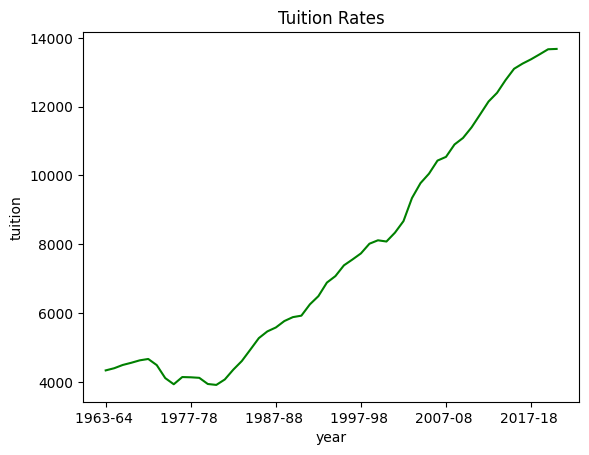

In [87]:
ax = plt.gca()
ax.set_xlabel("year")
ax.set_ylabel("tuition")

# line plot for tuition rates
tuition_const.plot(kind='line',
        x='year',
        y='tuition',
        color='green', ax=ax)
plt.title('Tuition Rates')

print(color.BOLD + color.RED + color.HIGHTLIGHT + 'Author: Reza Husain' + color.END)
plt.show()


#### Growth Rate of Graduation from 4 Years College

Graduation rate decreases while tuition rate increases.
Author: Luke Kim


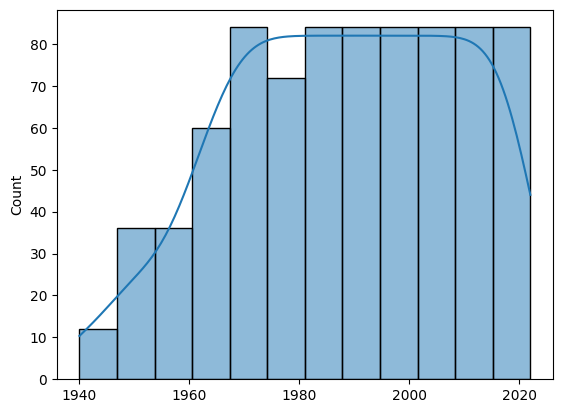

In [88]:
# plot the graduates and growth rate
import seaborn as sbn


# plt.subplots(figsize=(10,10))
# sbn.set(rc={"figure.figsize":(5, 100)}) 
# sbn.displot(dataset, kde=True, aspect=1, x=index_stringify)

sbn.histplot(graduation['4 years or more'], kde=True, x= dataset.index)

print("Graduation rate decreases while tuition rate increases.")
print(color.BOLD + color.BLUE + color.HIGHTLIGHT  + 'Author: Luke Kim' + color.END)


##### GPA Growth rate



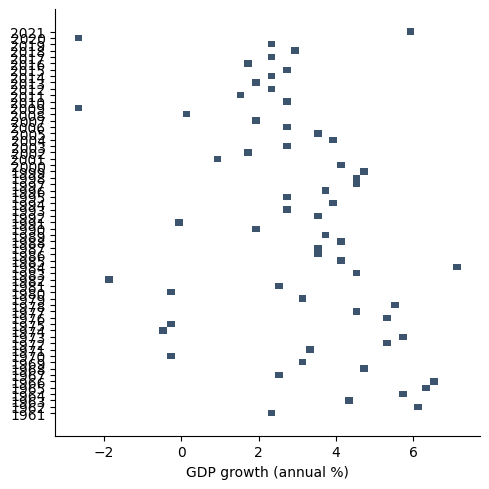

In [89]:
gdp = gdp.sort_index(ascending=False)


sbn.displot(gdp, x = gdp['GDP growth (annual %)'], y = gdp['GDP growth (annual %)'].index, bins=50, aspect=1)

# print(color.BOLD + color.BLUE + color.HIGHTLIGHT  + 'Author: Luke Kim' + color.END)
# dataset['graduation_growth_rate']


Author: Luke Kim


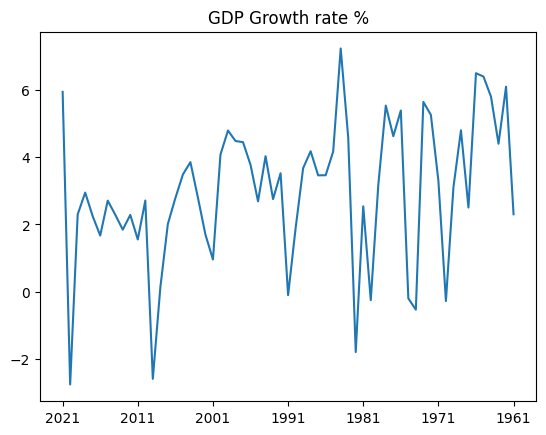

,GDP growth (annual %)
2021,5.945485
2020,-2.767803
2019,2.294439
2018,2.945385
2017,2.241921
...,...
1965,6.4
1964,5.8
1963,4.4
1962,6.1


In [90]:
# Relation between graduation rate and GDP

ax = gdp['GDP growth (annual %)'].plot(title="GDP Growth rate %", y=gdp['GDP growth (annual %)'])

print(color.BOLD + color.BLUE + color.HIGHTLIGHT + 'Author: Luke Kim' + color.END)
plt.show(ax)
display(gdp)


/var/folders/mr/3c7ftv_j0d52jvlpc_zj24c40000gn/T/ipykernel_1537/2682116623.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['4 years or more'] = df3['4 years or more'].replace(np.NaN, 9002.0)
/var/folders/mr/3c7ftv_j0d52jvlpc_zj24c40000gn/T/ipykernel_1537/2682116623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['graduation_growth_rate']=df3['graduation_growth_rate'].replace(np.NaN, 0.181830)


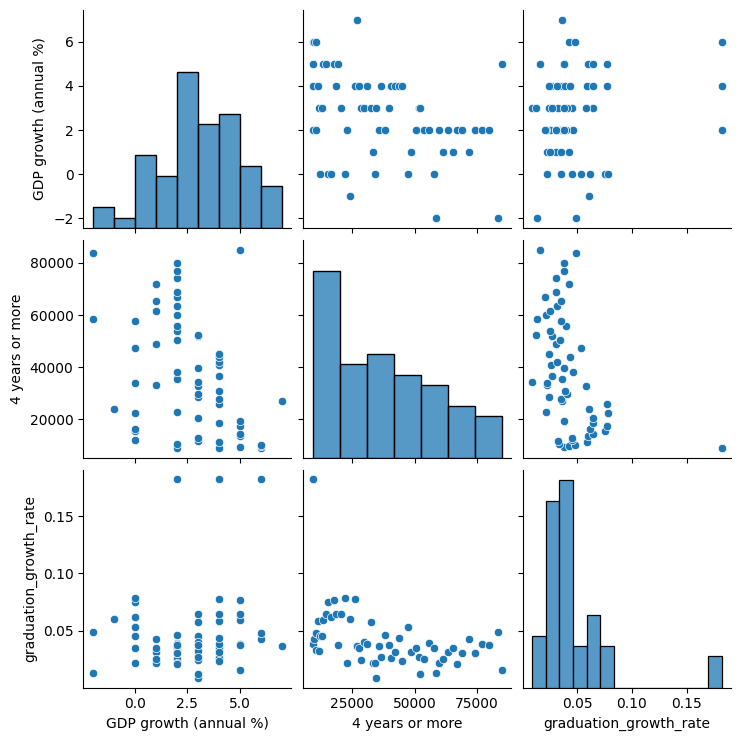

In [91]:
# Testing for Graduation Rate and GDP growth rate from 1961 to 2022
gdp['GDP growth (annual %)'] = gdp['GDP growth (annual %)'].astype(int)
gdp.index = gdp.index.astype(int)

# join
newData = gdp.join(dataset, how='left')
# remving duplicated indices
df3 = newData[~newData.index.duplicated(keep='first')]

df3['4 years or more'] = df3['4 years or more'].replace(np.NaN, 9002.0)
df3['graduation_growth_rate']=df3['graduation_growth_rate'].replace(np.NaN, 0.181830)

df3.head(20)

sbn.pairplot(df3)
plt.show()

Author: Luke Kim
Author: Luke Kim


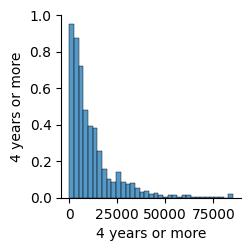

In [92]:
print(color.BOLD + color.BLUE + color.HIGHTLIGHT  + 'Author: Luke Kim' + color.END)
fyr = pd.DataFrame(dataset['4 years or more'])
print(color.BOLD + color.BLUE + color.HIGHTLIGHT  + 'Author: Luke Kim' + color.END)
sbn.pairplot(fyr)
plt.show()

# EDA: Findings of Exploration

We calculated the growth rate of graduation and use the data to explore the correlations of tuition rate increase and graduation rate.  We found that the graduation growth rate is decreasing from 2015, which contradicts our hypothesis.

> To explore further, we also use 3rd data source that also brings GDP growth rate  to find the correlation of tuition rate, graduation rate, and GDP growth rate.

From visualization, we can see from the normal distribution, the GDP growth rate is left skewed (the plot was 2022-1965), implying that the GDP growth rate is also diminishing and has correlation to the graduation rate.

> 
However, the slow GDP growth rate does not seems to effect either on the graduation rate or increasing tuitions.



## Model Planning

We will use "Supervised Learning" to predict the data
We will apply regression techniques and clustering to gain insights of the data and its trends.

## Linear Regression

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error


# first testing the 
X = dataset[['4 years or more']]
y = dataset['graduation_growth_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

linModel = LinearRegression().fit(X_train, y_train)
prdtd_data = linModel.predict(X_test)
prdtd_data 

print('Predicted Values')
print (prdtd_data[:10])
# print(prdtd_data[:10])

print('\n Actual Values')
print(y_test[:10])

#: print the model coefficient with feature names
print("\nCOEFFICIENT")

print(X_train)
print(linModel.coef_)

#print the model intercept
print("\nINTERCEPT")
print(linModel.intercept_)

# : print the r-squared
r2 = r2_score(y_test, prdtd_data)
print('\nR-Squared')
print(r2)
display("")
#: print the mean squared error for training
prdtd_train = linModel.predict(X_train)
print('\nMean Square Error for Training')
print(str(mean_squared_error(y_train, prdtd_train) * 100))

# #: print the mean squared error for testing
print("\nMean Square Error for Testing")
print(str(mean_squared_error(y_test, prdtd_data) * 100))


Predicted Values
[0.03541079 0.03568682 0.03559041 0.03621471 0.03462721 0.03261386
 0.03566984 0.0344752  0.03613658 0.03633838]

 Actual Values
2014    0.035633
2011    0.041900
2002    0.081643
1968    0.041240
2010   -0.002753
2007    0.039501
1998    0.031647
2015    0.021492
1983    0.060270
1969    0.135368
Name: graduation_growth_rate, dtype: float64

COEFFICIENT
      4 years or more
1986             2382
1999            43803
2011             6151
1950              714
1995            17594
...               ...
1970             3926
2002            11834
1974             1463
1972             5309
2014            12246

[643 rows x 1 columns]
[-6.84768404e-08]

INTERCEPT
0.03643774131484451

R-Squared
-0.01179553845544068


''


Mean Square Error for Training
1.6658248307612737

Mean Square Error for Testing
2.1706467529747338


Text(0, 0.5, 'rate')

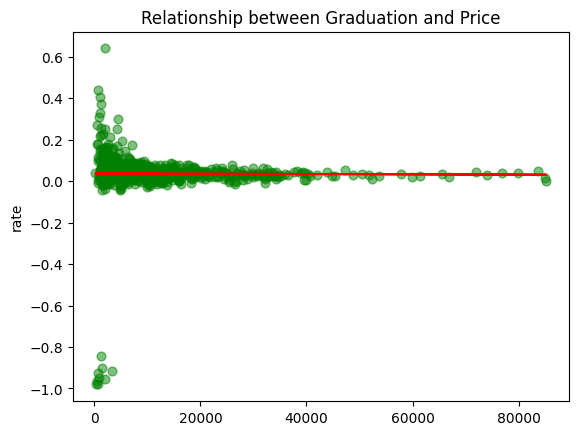

In [94]:
# apply linear regression on dataset

pred_train = linModel.predict(X_train)
pred_test = linModel.predict(X_test)

#plot relationship between RM and price
plt.scatter(X_train,
            y_train,
            c='g',
            s=40,
            alpha=0.5)
plt.plot(X_train, pred_train, color='r')
plt.title('Relationship between Graduation and Price')
plt.ylabel('rate')


2022
25 Years and Over, Male
2022
25 Years and Over, Female
2022
25 to 34 Years, Both Sexes
2022
25 to 34 Years, Male
2022
25 to 34 Years, Female
2022
35 to 54 Years, Both Sexes
2022
35 to 54 Years, Male
2022
35 to 54 Years, Female
2022
55 Years and Over, Both Sexes
2022
55 Years and Over, Male
2022
55 Years and Over, Female
2022

### Regression Testing from GDP and graduation Data
#### using combined DF3 frame

Pros: 
* Linear Regression is efficient in training data and good for the dig datasets
* It is easier to know how the prediction is made.
* There is no parameter value

Cons: 
* It often assume that there is a linear relations btween data therefore it is not accurate often 
* It is weight the average prediction, there is limits when try to predict the extreme, quantile regression is good for such scenarios.
* sensitive to the extreme data width. 
* it often assume that the data is independent, but it is not justifiable.
* It is not often clear why the prediction is the way it is. 

# Linear Regression Result

> The Mean Square Error for Training is 0.10407615983170834: Indicating that it is great model that accurately predict the data. 0.5  > MSE

> Mean Square Error for Testing is 0.17249724637331845: Indicating a good model that can predict accurate data.

> Coefficient: [0.0037359]
>> It is an Average Target Prediction rate as it becomes to 0
>> If the target prediction is close to the outcome, it is close to 1.

In [95]:
df3.head(10)


,GDP growth (annual %),4 years or more,graduation_growth_rate
1961,2,9002.0,0.181830
1962,6,9002.0,0.181830
1963,4,9002.0,0.181830
1964,5,9345.0,0.038103
1965,6,9742.0,0.042483
1966,6,10212.0,0.048245
1967,2,10550.0,0.033098
1968,4,11171.0,0.058863
1969,3,11535.0,0.032584
1970,0,12062.0,0.045687


### Regression Testing with Two Dataframes ( graduation rate and gdp growth rate)


Predicted Values
[0.04318431 0.04145176 0.04838197 0.04664942 0.04491687 0.0397192
 0.04318431 0.05011453 0.04491687 0.05011453]

 Actual Values
1961    0.181830
2016    0.042860
2021    0.015962
1998    0.031354
2004    0.027112
1991    0.022078
1981    0.021674
1966    0.048245
1969    0.032584
1962    0.181830
Name: graduation_growth_rate, dtype: float64

COEFFICIENT
[0.00173255]

INTERCEPT
0.03971920357554677

R-Squared
-0.016087749324625866


''


Mean Square Error for Training
0.06848353361328002

Mean Square Error for Testing
0.30812443501455045


Text(0, 0.5, 'rate')

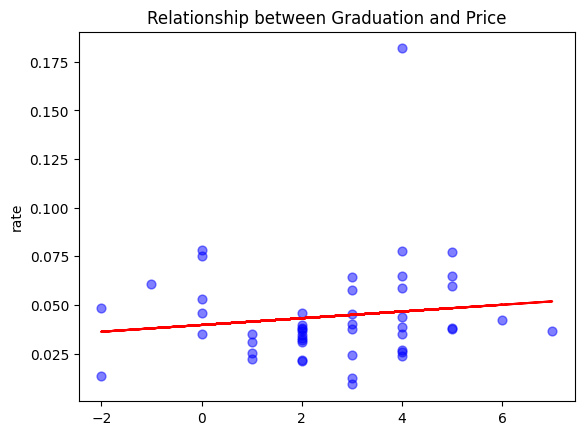

In [96]:
# Testing the GDP and Graduation Rate 
X = df3[['GDP growth (annual %)']]
y = df3['graduation_growth_rate']

X_train_input, X_test_input, y_train_target, y_test_target = train_test_split(X, y, test_size = 0.20)

linModel = LinearRegression().fit(X_train_input, y_train_target)
prdtd_data = linModel.predict(X_test_input)
prdtd_data 

print('Predicted Values')
print (prdtd_data[:10])
# print(prdtd_data[:10])

print('\n Actual Values')
print(y_test_target[:10])

#: print the model coefficient with feature names
print("\nCOEFFICIENT")
# print(X_train)
print(linModel.coef_)

#print the model intercept
print("\nINTERCEPT")
print(linModel.intercept_)

# : print the r-squared
r2 = r2_score(y_test_target, prdtd_data)
print('\nR-Squared')
print(r2)
display("")
#: print the mean squared error for training
prdtd_train = linModel.predict(X_train_input)
print('\nMean Square Error for Training')
print(str(mean_squared_error(y_train_target, prdtd_train) * 100))

# #: print the mean squared error for testing
print("\nMean Square Error for Testing")
print(str(mean_squared_error(y_test_target, prdtd_data) * 100))

pred_train = linModel.predict(X_train_input)
pred_test = linModel.predict(X_test_input)

#plot relationship between RM and price
plt.scatter(X_train_input,
            y_train_target,
            c='b',
            s=40,
            alpha=0.5)
plt.plot(X_train_input, pred_train, color='r')
plt.title('Relationship between Graduation and Price')
plt.ylabel('rate')

## Outcome

The Mean Square Error for Training is 0.10407615983170834 
* indicating that it is great model that accurately predict the data. 0.5  > MSE
Mean Square Error for Testing is 0.17249724637331845
* good model that can predict acurate data.

# K-Neigbor Regression

In [97]:
from sklearn.neighbors import KNeighborsRegressor

train_input, test_input, train_target, test_target = train_test_split(X, y)

#underfiting training set to explor more on the outcome and train data.
train_input = train_input.values.reshape(-1, 1)
test_input = test_input.values.reshape(-1, 1)

knr = KNeighborsRegressor()
knr.n_neighbors = 6 # default  = 5
knr.fit(train_input, train_target)

print("the coefficient of determination R^2 of the prediction: ", knr.score(test_input, test_target))
print("the coefficient of determination R^2 of the target training: ", knr.score(train_input, train_target))


the coefficient of determination R^2 of the prediction:  -1.6402726482250314
the coefficient of determination R^2 of the target training:  -0.007506082580565954


## Outcome
* the coefficient of determination R^2 of the prediction:  -1.229654463595757
* the coefficient of determination R^2 of the target training:  0.07751665742045721

K-Regressor to determine the testing
* Since the score is lower than the testing set, it is "underfitting", meaning the data is not trained well in K-Neighbor Regression, 
* Probably, it is because the training set is simple to explain the variable/scattered across the point or the number of training is lower.
* predictor is too inflexible that it cannot capture the pattern.



# NKK Classification


      4 years or more       Tuition  Target
1968            11171   4714.725456       0
1969            11535   5041.302500       1
1970            12062   5259.592862       1
1971            12612   5390.787280       1
1972            13364   5533.755097       1
1973            14228   5841.927897       1
1974            15300   5556.983863       1
1975            16244   5122.016501       1
1976            17496   5092.086159       0
1977            18627   5462.821709       1
1978            19332   5426.092767       1
1979            20579   5365.739227       1
1980            22193   5128.368094       1
1981            22674   5099.454421       1
1982            24050   5333.132258       1
1983            25915   5735.893340       0
1984            26862   6059.072554       0
1985            27808   6387.888927       0
1986            28489   6733.388663       0
1987            29637   7196.960547       1
1988            30787   7271.148973       1
1989            32565   7539.388

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


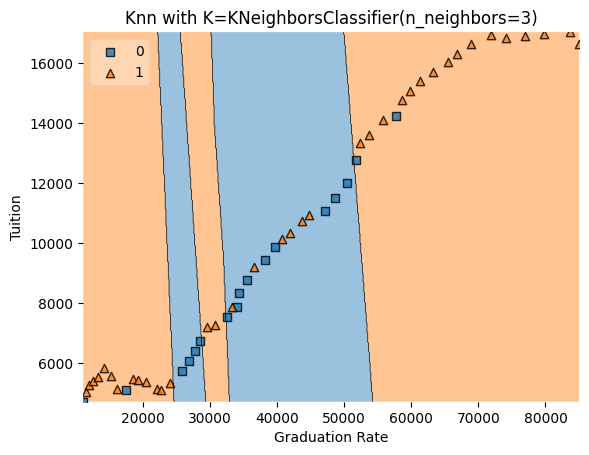

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from mlxtend.plotting import plot_decision_regions


#Im doing KNN classification on two features
constant_dollars = tuition_xls["Constant 2020-21 dollars1"]["Tuition and required fees2"]
tuition_const = constant_dollars['4-year']
tuition_const = tuition_const[2:56]
#Flip the dataframe
year_complet = graduation_xlsx["Years of school completed"]
graduation = pd.DataFrame(year_complet["College"]["4 years or more"])
graduation = graduation[1:55]
graduation = graduation.iloc[::-1]
rates = graduation
rates['Tuition'] = tuition_const.values
#Target will be
avg = rates.iloc[:, 0]/rates.iloc[:, 1]
rates['Target'] = np.where((avg > avg.shift(-1)), 0, 1)
print(rates)

X = rates.iloc[:, 0:2]
y = rates.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(pred)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
# Plotting decision region
plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=knn, legend=2)
# Adding axes annotations
plt.xlabel('Graduation Rate')
plt.ylabel('Tuition')
plt.title('Knn with K='+ str(knn))
plt.show()

# Lessons Learned

* For the KNN Classification, it was found that tuition did not slow down the rate of graduation. Instead it  grew even faster.
* Tuition and Graduation does not have strong correlations with the GDP growth rate. 
* Mining right data for the problem is the most important task for any data scientist.
* Data cleaning is an important step to make right application and future testing.
* Understanding the ML models in a way that which has pros and cons.



## Reflection

1. Decreasing graduation rate will give us an interesting insight for further exploration on tuition, GDP, and graduation.
2. It is hard to make use of the overwhelm python packages. We will slowly adopt and working toward to finish the project successfully.
3. There are many data exploration and analysis libraries and way to analyze data that some times disturbs our initial intensions.
4. Teamwork was not easy, but we find possiblities to work toward and hard.




## References

* Class Activity Files and Labs
* Understanding a Classification Report For Your Machine Learning Model -
> https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397
